In [719]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [720]:
path=os.getcwd()+'/data/ex2data1.txt'
data=pd.read_csv(path,header=None,names=['Exam1','Exam2','Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [721]:

cols=data.shape[1]
X=data.iloc[:,0:cols-1]
Y=data.iloc[:,cols-1:cols]
train=(X-X.mean())/X.std()
train.insert(0,'ones',1)

In [722]:
positive = data[data['Admitted'].isin([1])]  
negative = data[data['Admitted'].isin([0])]

Text(0,0.5,u'Exam 2 Score')

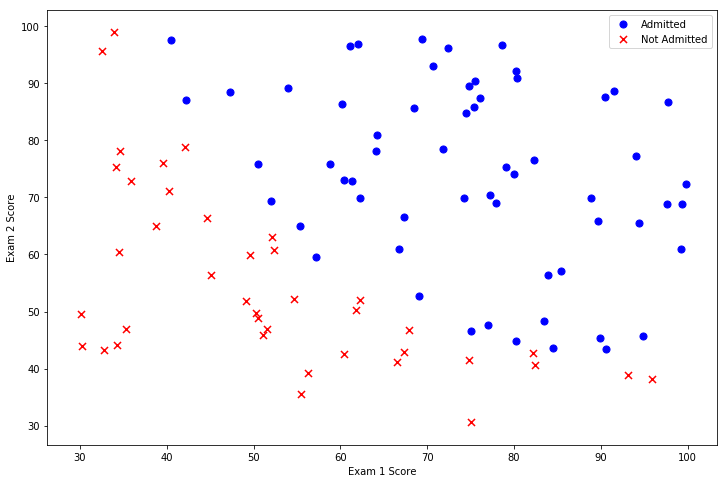

In [723]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive.Exam1,positive.Exam2,s=50,c='b',marker='o', label='Admitted')
ax.scatter(negative.Exam1,negative.Exam2,s=50,c='r',marker='x', label='Not Admitted')
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')  

In [724]:
theta=np.matrix(np.array([0,0,0]))
train=np.matrix(train.values)
Y=np.matrix(Y.values)

In [725]:
def sigmoid(z):
   return 1/(1+np.exp(-z))

In [726]:
def computeCost(train , Y , theta):
    hx=sigmoid(train*theta.T)
    term1=np.multiply(-Y,np.log(hx))
    term2=np.multiply((1-Y),np.log(1-hx))
    total=np.sum(term1-term2)
    return (total)/len(train)

In [727]:
c=computeCost(train , Y , theta)
c

0.69314718055994529

In [728]:
def gradientdecent(train ,Y , theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape[1]))
    parameters=int(theta.shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=(sigmoid(train*theta.T)-Y)
        for j in range(parameters):
            term=np.multiply(error,train[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(train))*np.sum(term))
        theta=temp
        cost[i]=computeCost(train,Y,theta)
    return theta,cost

In [729]:
alpha=0.02
iters=1000
t,c=gradientdecent(train ,Y , theta,alpha,iters)

In [730]:
t

matrix([[ 0.67009269,  1.77665686,  1.60304703]])

In [731]:
computeCost(train,Y,t)

0.2629672021697988

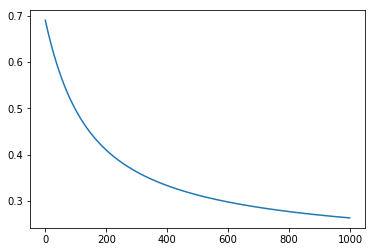

In [732]:
plt.plot(np.arange(iters),c)

In [741]:

def predict(theta, testmatrix):  
    probability = sigmoid( testmatrix* theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

test=np.array([(32,77),(45,45),(45,43),(60,60),(70,70),(80,80),(54,55),(55,54),(77,32)])
testd = pd.DataFrame(data=test,columns=['Exam1', 'Exam2'])
testdf=(testd-testd.mean())/testd.std() 
testdf.insert(0,'ones',1)
testmatrix=np.matrix(testdf.values)

theta_min = t 
predictions = predict(theta_min, testmatrix) 
testd.insert(2,'Admitted',predictions)
testd
#correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]  
#accuracy = (sum(map(int, correct)) % len(correct))  
#print 'accuracy = {0}%'.format(accuracy),predictions

,Exam1,Exam2,Admitted
0,32,77,0
1,45,45,0
2,45,43,0
3,60,60,1
4,70,70,1
5,80,80,1
6,54,55,1
7,55,54,1
8,77,32,1


Text(0,0.5,u'Exam 2 Score')

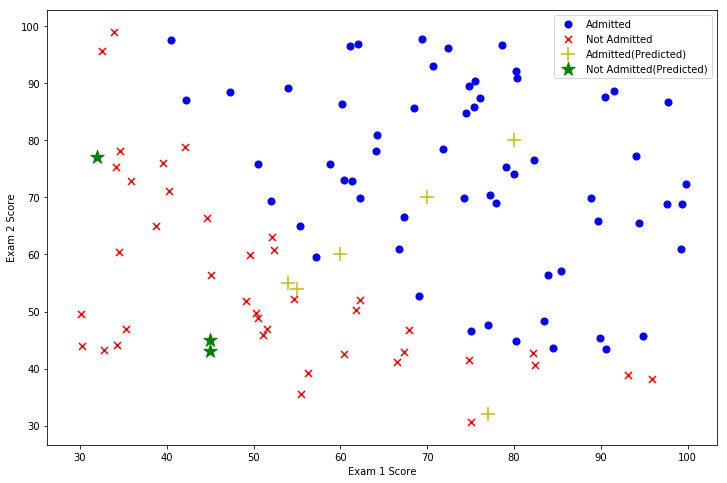

In [742]:
positive1 = testd[testd['Admitted'].isin([1])]  
negative1 = testd[testd['Admitted'].isin([0])]
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive.Exam1,positive.Exam2,s=50,c='b',marker='o', label='Admitted')
ax.scatter(negative.Exam1,negative.Exam2,s=50,c='r',marker='x', label='Not Admitted')
ax.scatter(positive1.Exam1,positive1.Exam2,s=200,c='y',marker='+', label='Admitted(Predicted)')
ax.scatter(negative1.Exam1,negative1.Exam2,s=200,c='g',marker='*', label='Not Admitted(Predicted)')

ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score') 

In [735]:
predictions = predict(theta_min, train) 

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print 'accuracy = {0}%'.format(accuracy)

accuracy = 90%
